In [1]:
## 为了得到数据中哪部分是noise像素，需要比较数据集中的clean和noise data。
## 比较误差大小，noise的误差要更大。
# 输出是每张图片的mask，存在npy中，标记训练数据中哪些是noise像素。
import sys  
sys.path.append('..')  
import os
import numpy as np
from internal import utils
from PIL import Image

import json
from pathlib import Path, PurePath

def load_from_json(filename: Path):
    """Load a dictionary from a JSON filename.

    Args:
        filename: The filename to load from.
    """
    assert filename.suffix == ".json"
    with open(filename, encoding="UTF-8") as file:
        return json.load(file)
# configs 配置路径
data_dir = '/home/wyk/lava2/Model/multinerf/data/yoda/0'
json_dir = PurePath(data_dir + "/transforms.json")
meta = load_from_json(json_dir)


# Load images.加载图片
image_names = []
for frame in meta["frames"]:
    filepath = PurePath(frame["file_path"])
    fname = filepath
    
    image_names.append(fname)
    
print(image_names.__len__())


420


In [2]:

images = [utils.load_img(x) for x in image_names]
images = np.stack(images, axis=0) / 255.

(420, 432, 432, 3)


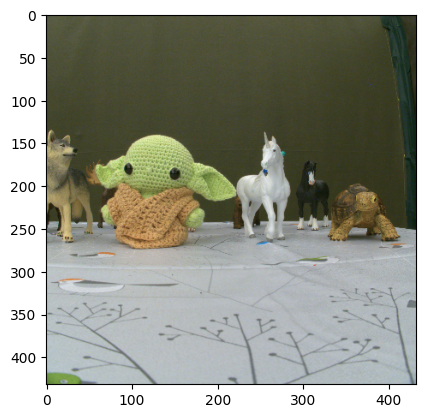

PurePosixPath('/home/wyk/lava2/Dataset/RobustNerf/yoda/0/images_8/0clean1.jpg')

In [3]:
import matplotlib.pyplot as plt
print(images.shape)
plt.imshow(images[0])
plt.show()
image_names[0]


In [4]:
# 需要读取两种图像，clean 和 clutter，然后对比，计算mask

clean_path = np.array([name for name in image_names if name.name.startswith('0clean')])
# print(clean_path[-10:])
clutter_path = np.array([name for name in image_names if name.name.startswith('2clutter')])
# print(clutter_path[-10:])
mask_dir = data_dir + "/noise_mask"
if not os.path.exists(mask_dir):
    os.makedirs(mask_dir)


for clean_, clutter_ in zip(clean_path, clutter_path):
    if(int(clean_.name.split('.')[0].split('clean')[-1]) != int(clutter_.name.split('.')[0].split('clutter')[-1])):
        print('clean 和 clutter 对应错误！')
        break
        
    clean_image = utils.load_img(clean_)
    clean_image = clean_image / 255.
    print("clean_image:", clean_image.shape)
    # plt.imshow(clean_image)
    # plt.show()
    
    clutter_image = utils.load_img(clutter_)
    clutter_image = clutter_image / 255.
    print("clutter_image: ", clutter_image.shape)
    # plt.imshow(clutter_image)
    # plt.show()
    
    residual = np.abs((clutter_image - clean_image).mean(axis=-1))
    print("residual: ", residual.shape)
    print(residual.min(), residual.max())
    print(residual)
    
    # noise_mask = np.zeros_like(residual)
    noise_mask = (residual>0.05).astype(int)
    print("noise_mask:",  noise_mask.shape)
    print(noise_mask)
    # plt.imshow(noise_mask)
    # plt.show()
    
    # plt.imshow(1-noise_mask)
    # plt.show()
    
    
    mask_file = PurePath( mask_dir + '/' + clean_.name ).with_suffix('.npy')
    print(mask_file)
    
    np.save(mask_file, noise_mask)
    
    
    # break
        



clean_image: (432, 432, 3)
clutter_image:  (432, 432, 3)
residual:  (432, 432)
0.0 0.55947715
[[1.5686279e-02 9.1503309e-03 7.8431414e-03 ... 1.0457516e-02
  7.8431321e-03 2.6143789e-03]
 [3.0065363e-02 1.3071895e-03 5.2287579e-03 ... 2.6143789e-03
  2.6143789e-03 3.9215684e-03]
 [1.0457516e-02 2.2222226e-02 5.2287630e-03 ... 6.5359524e-03
  7.8431340e-03 2.2222221e-02]
 ...
 [1.0457516e-02 9.9341078e-09 1.3071895e-02 ... 1.3071895e-02
  3.9215684e-03 1.3071895e-03]
 [1.3071895e-03 2.6143789e-03 9.9341078e-09 ... 1.3071895e-03
  7.8431368e-03 1.5686274e-02]
 [3.9215684e-03 5.2287579e-03 6.5359473e-03 ... 1.1764705e-02
  1.4379084e-02 1.4379084e-02]]
noise_mask: (432, 432)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
/home/wyk/lava2/Model/multinerf/data/yoda/0/noise_mask/0clean1.npy
clean_image: (432, 432, 3)
clutter_image:  (432, 432, 3)
residual:  (432, 432)
0.0 0.7163399
[[2.6143789e-03 1.0457520e-02 1.5686274